<a href="https://colab.research.google.com/github/Nachiyarr/mnist-classification/blob/main/deep2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape


(60000, 28, 28)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
single_image= X_train[0]

In [ ]:
single_image.shape

(28, 28)

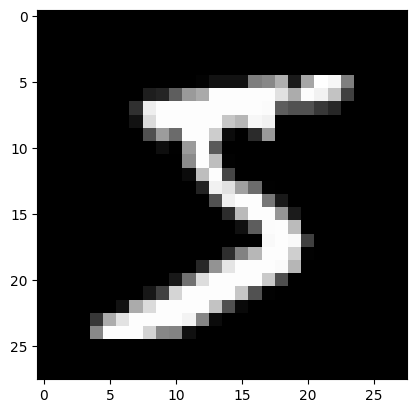

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:

y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

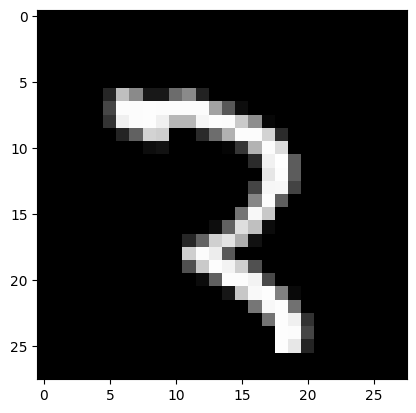

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,batch_size=64,validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 26s 27ms/step - loss: 0.2505 - accuracy: 0.9284 - val_loss: 0.0947 - val_accuracy: 0.9716
Epoch 2/5
938/938 [==============================] - 25s 26ms/step - loss: 0.0798 - accuracy: 0.9763 - val_loss: 0.0594 - val_accuracy: 0.9808
Epoch 3/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0559 - accuracy: 0.9833 - val_loss: 0.0530 - val_accuracy: 0.9820
Epoch 4/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0425 - accuracy: 0.9862 - val_loss: 0.0487 - val_accuracy: 0.9837
Epoch 5/5
938/938 [==============================] - 22s 24ms/step - loss: 0.0350 - accuracy: 0.9890 - val_loss: 0.0522 - val_accuracy: 0.9833


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:

metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.250459,0.928450,0.094736,0.9716
1,0.079793,0.976283,0.059405,0.9808
2,0.055892,0.983333,0.052985,0.9820
3,0.042500,0.986233,0.048749,0.9837
4,0.035021,0.989017,0.052244,0.9833


In [2]:
print("ALAGU NACHIYAR:212222240006")

ALAGU NACHIYAR:212222240006


<Axes: >

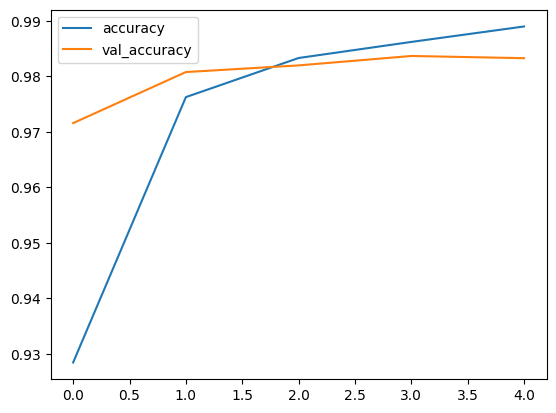

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [3]:
print("ALAGU NACHIYAR:212222240006")

ALAGU NACHIYAR:212222240006


<Axes: >

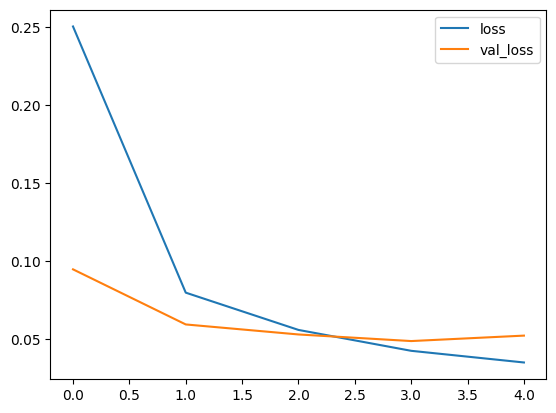

In [ ]:
metrics[['loss','val_loss']].plot()


ALAGU NACHIYAR:212222240006


In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

print(confusion_matrix(y_test,x_test_predictions))

print(classification_report(y_test,x_test_predictions))

313/313 [==============================] - 4s 10ms/step
[[ 973    0    3    0    0    0    2    1    1    0]
 [   0 1129    3    0    0    0    1    1    1    0]
 [   3    1 1019    0    2    0    0    3    3    1]
 [   0    0    6  998    0    1    0    1    3    1]
 [   0    0    1    0  976    0    0    0    0    5]
 [   1    0    1   21    0  857    3    0    7    2]
 [   7    3    2    0    4    1  937    0    4    0]
 [   0    2   13    0    0    0    0 1009    1    3]
 [   3    0    7    1    2    1    0    3  953    4]
 [   0    1    0    5   10    0    0    9    2  982]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       1.00      0.96      0.98       892
           6       0.99      0.98 

In [ ]:
img = image.load_img('7.png')

In [ ]:
img = image.load_img('7.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(model.predict(img_28_gray_scaled.reshape(1,28,28,1)),axis=1)

1/1 [==============================] - 0s 89ms/step


In [ ]:
print(x_single_prediction)

[8]


ALAGU NACHIYAR:212222240006

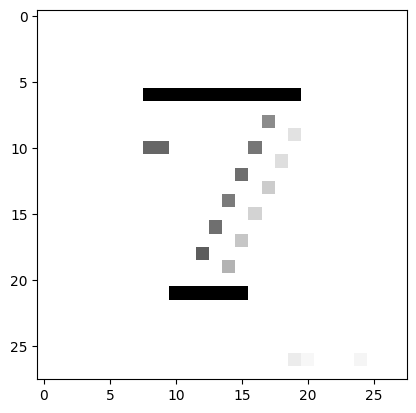

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),axis=1)

print(x_single_prediction)


1/1 [==============================] - 0s 31ms/step
[3]
